<a href="https://colab.research.google.com/github/alejandromunizsiques/WorkPlace/blob/master/Reproducir_gr%C3%A1fico_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1- Descripcion de la tarea

Nos basaremos en una de tus tareas de un ejercicio anterior.

El conjunto de datos que se te da aquí es el conjunto de datos de hipoteca usado anteriormente en este curso. Tu meta es reproducir un gráfico.  No te preocupes si el gráfico luce exactamente igual. Es posible que puedas crear un gráfico más placentero a la vista e informativo a la vez. La línea negra es la hipoteca de 30 años al 5% y la línea azul es al 3%. Lo que está graficado es el interés acumulado pagado en el transcurso del préstamo. 

Pista: plt.xticks(fontsize = 15) y plt.yticks(fontsize = 15) podrían ser útiles para hacer los tics más grandes. 

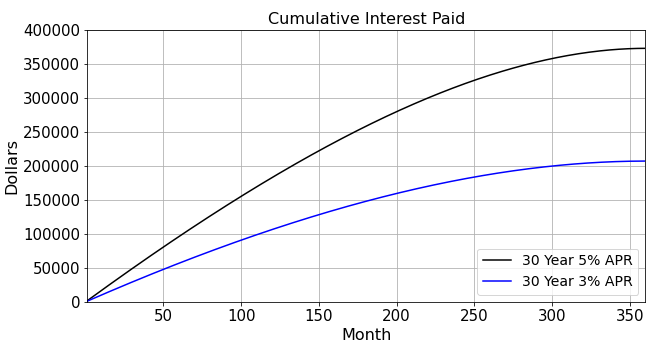

# 2- Monteja de google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3-  Carga de Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# 4- Carga y montaje del DataSet

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/ Visualización de datos con Python/mortgages.csv')
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


# 5- Desarrollo del ejercicio

## 5.1 - Filtro al a 30 años con 5 % de interes

In [9]:
filtro_30 = df["Mortgage Name"] == "30 Year"
filtro_5 = df["Interest Rate"] == 0.05
df_30_5 = df.loc[filtro_30 & filtro_5 ,:]
df_30_5 = df_30_5[["Month", "Interest Paid"]]
df_30_5

,Month,Interest Paid
360,1,1666.66
361,2,1664.66
362,3,1662.65
363,4,1660.63
364,5,1658.60
...,...,...
715,356,44.15
716,357,35.38
717,358,26.58
718,359,17.75


## 5.2 Creacion y suma acumulada de la variable "Acumulados"

In [15]:
df_30_5 = df_30_5.assign(acumulado = df_30_5["Interest Paid"].cumsum())
df_30_5.head()

,Month,Interest Paid,acumulado
360,1,1666.66,1666.66
361,2,1664.66,3331.32
362,3,1662.65,4993.97
363,4,1660.63,6654.60
364,5,1658.60,8313.20


## 5.3- Asignacion de variables con interes de 5%

In [13]:
meses_30_5 = df_30_5.loc[:,"Month"].values
acomulado_30_05 = df_30_5.loc[:,"acumulado"].values

## 5.4-  Filtro a 30 años con 3% de interes y creacion de suma acomulada

In [22]:
filtro_3 = df["Interest Rate"] == 0.03
df_30_3 = df.loc[filtro_30 & filtro_3,:]
df_30_3 = df_30_3[["Month","Interest Paid" ]]

df_30_3 = df_30_3.assign(acumulado = df_30_3["Interest Paid"].cumsum())
df_30_3.head()


,Month,Interest Paid,acumulado
0,1,1000.00,1000.00
1,2,998.28,1998.28
2,3,996.56,2994.84
3,4,994.83,3989.67
4,5,993.10,4982.77


## 5.5 - Asignacion de variables con interes de 3%

In [24]:
meses_30_3 = df_30_3.loc[:,"Month"].values
acomulado_30_03 = df_30_3.loc[:,"acumulado"].values

# 6- Graficos

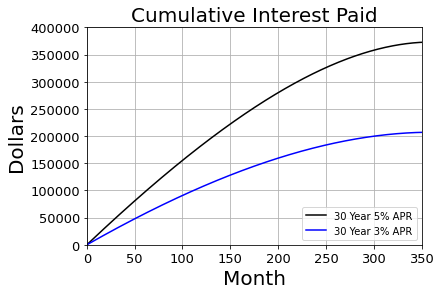

In [47]:
plt.plot(meses_30_5,acomulado_30_05 , c = "K", label = "30 Year 5% APR")
plt.plot(meses_30_3,acomulado_30_03, c = "blue", label = "30 Year 3% APR")
plt.ylim(bottom = 0, top = 400000)
plt.xlim(left = 0, right = 350)
plt.xlabel('Month', fontsize = 20 )
plt.ylabel('Dollars', fontsize = 20)
plt.title('Cumulative Interest Paid', fontsize = 20)
plt.grid()
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)
plt.legend(loc = "lower right")